# ARTIFICIAL NEURAL NETWORK (ANN) BASICS

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

==========

## Predicting Cars Purchasing | ANNs Basics (Regression Case-study)

Data Source: https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model

## Data Importing & Inspecting

In [4]:
cars = pd.read_csv('car_purchasing_data.csv', encoding='ISO-8859-1')
cars

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
cars.describe().round(2)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.00,500.00,500.00,500.00,500.00,500.00
mean,0.51,46.24,62127.24,9607.65,431475.71,44209.80
std,0.50,7.98,11703.38,3489.19,173536.76,10773.18
min,0.00,20.00,20000.00,100.00,20000.00,9000.00
25%,0.00,40.95,54391.98,7397.52,299824.20,37629.90
50%,1.00,46.05,62915.50,9655.04,426750.12,43997.78
75%,1.00,51.61,70117.86,11798.87,557324.48,51254.71
max,1.00,70.00,100000.00,20000.00,1000000.00,80000.00


## Data Exploration

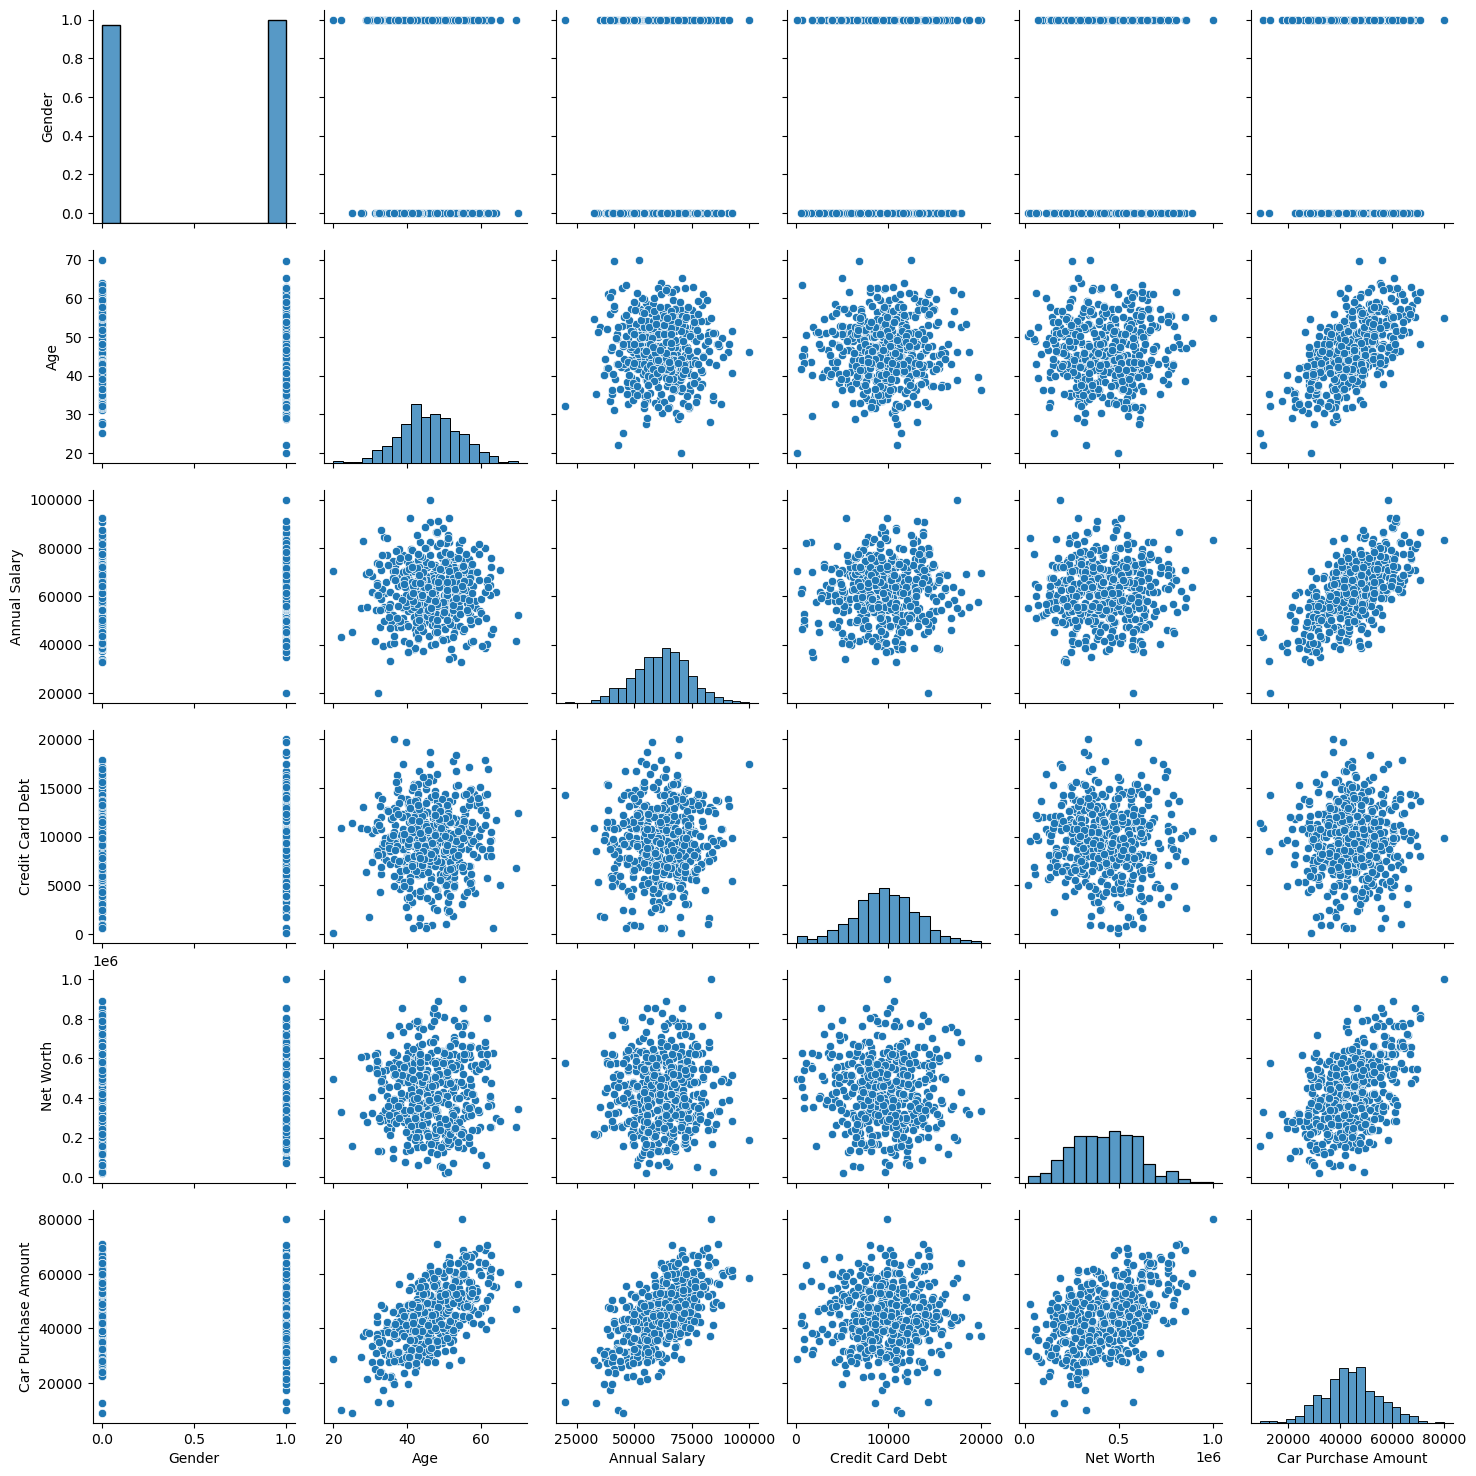

In [7]:
sns.pairplot(cars)

<AxesSubplot:>

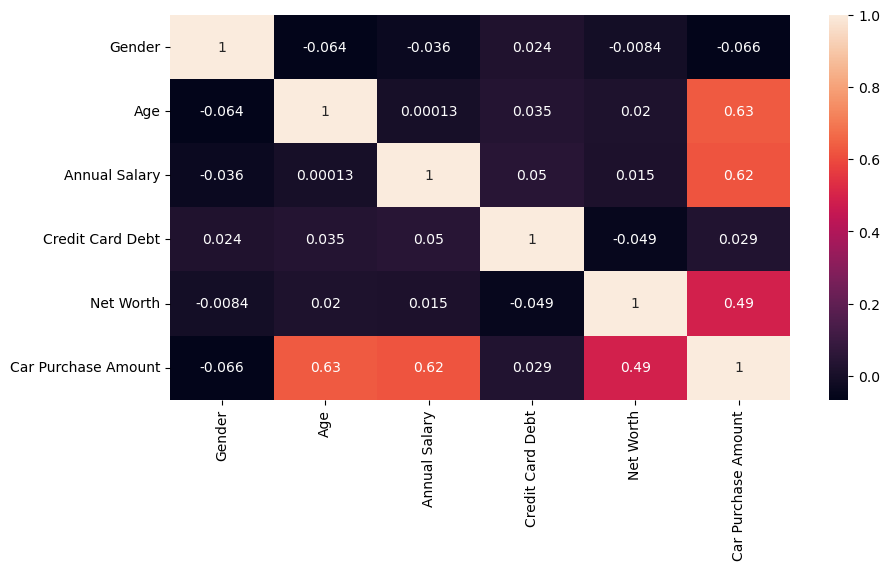

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(cars.corr(), annot=True)

## Data Preprocessing

##### Selecting Data

In [9]:
X = cars.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [10]:
y = cars['Car Purchase Amount']
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

##### Scaling Data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [12]:
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

##### Splitting Data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

## Machine Learning Model

##### Model Training 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
reg.coef_

array([[-1.71961781e-06,  5.92650798e-01,  6.33611749e-01,
         7.25118855e-07,  4.00056227e-01]])

In [17]:
reg.intercept_

array([-0.31675651])

##### Model Evaluation 

In [18]:
reg.predict([[1, 50, 50000, 10985, 629312]])

array([[283470.09528311]])

In [19]:
y_pred = reg.predict(X_test)
y_pred

array([[0.68037368],
       [0.68253826],
       [0.60015153],
       [0.39544977],
       [0.40774674],
       [0.45867232],
       [0.3979064 ],
       [0.81858667],
       [0.54901351],
       [0.19270489],
       [0.55075288],
       [0.37928723],
       [0.26804168],
       [0.16415299],
       [0.31729991],
       [0.42154294],
       [0.54372686],
       [0.45113457],
       [0.33251164],
       [0.61562126],
       [0.59932909],
       [0.62898442],
       [0.56469602],
       [0.30740828],
       [0.82287791],
       [0.52301405],
       [0.5343294 ],
       [0.72905023],
       [0.55657018],
       [0.45878793],
       [0.65319956],
       [0.54133673],
       [0.57734297],
       [0.64547078],
       [0.42112885],
       [0.53861356],
       [0.67781598],
       [0.48597518],
       [0.31563822],
       [0.43690519],
       [0.69077522],
       [0.616702  ],
       [0.6196284 ],
       [0.5256965 ],
       [0.64752685],
       [0.04983686],
       [0.6444752 ],
       [0.316

In [20]:
y_test

array([[0.68037083],
       [0.6825565 ],
       [0.60017103],
       [0.39544824],
       [0.40771621],
       [0.45869677],
       [0.39792327],
       [0.81860421],
       [0.54900684],
       [0.19270023],
       [0.55076214],
       [0.37927499],
       [0.26804521],
       [0.16412978],
       [0.3172683 ],
       [0.42155708],
       [0.54372318],
       [0.45118709],
       [0.33251345],
       [0.61562087],
       [0.59931944],
       [0.62895125],
       [0.56467566],
       [0.30740999],
       [0.82285018],
       [0.523032  ],
       [0.5343264 ],
       [0.72905982],
       [0.55660425],
       [0.45880771],
       [0.65320953],
       [0.54133778],
       [0.57734658],
       [0.64545808],
       [0.42114943],
       [0.53860366],
       [0.67782275],
       [0.48597146],
       [0.31561446],
       [0.43693203],
       [0.69078257],
       [0.61669253],
       [0.61959897],
       [0.5257114 ],
       [0.64750739],
       [0.04981603],
       [0.64444254],
       [0.316

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_test, y_pred)

0.999999982333071

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
print(mean_squared_error(y_test, y_pred))

4.179457574089878e-10


In [25]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2.044372171129777e-05


## Artificial Neural Network (ANN) Model

TensorFlow Playground: https://playground.tensorflow.org/

##### Model Training 

In [27]:
pip install tensorflow


     ------------------------------------ 266.3/266.3 MB 136.7 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 217.6 kB/s eta 0:00:00
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
     ------------------------------------ 439.2/439.2 kB 146.8 kB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 130.4 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 131.6 kB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 153.7 kB/s eta 0:00:00
     ------------------------------------ 895.9/895.9 kB 139.6 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 131.8 kB/s eta 0:00:00
     ------------------------------------ 124.6/124.6 kB 112.7 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 122.0 kB/s eta 0:00:00
     ------------------------------------ 177.0/177.0 kB 127.0 kB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 kB 48.

In [30]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [31]:
ann = Sequential()
ann.add(Dense(25, input_dim=5, activation='relu'))  # input 
ann.add(Dense(25, activation='relu'))                # hidden layer
ann.add(Dense(1, activation='linear'))               # out put 
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                150       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#ann.add(Dense())

In [32]:
ann.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
epochs_hist = ann.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/20
12/12 [==============================] - 1s 13ms/step - loss: 0.1685 - val_loss: 0.0973
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0656 - val_loss: 0.0313
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.0221
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0193 - val_loss: 0.0163
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0148
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.0116
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0087
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0069
Epoch 9/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0057
Epoch 10/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0047
Epoch 11/20
12/12 

##### Model Evaluation 

In [34]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


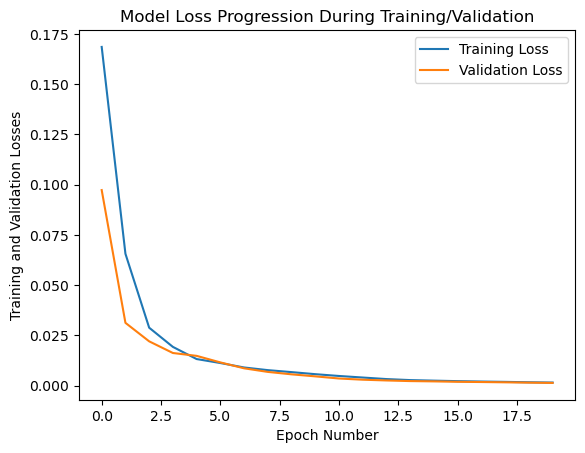

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [36]:
ann.predict(np.array([[1, 50, 50000, 10985, 629312]]))

1/1 [==============================] - 0s 76ms/step


array([[210743.92]], dtype=float32)

In [37]:
y_pred = ann.predict(X_test)
y_pred

4/4 [==============================] - 0s 4ms/step


array([[0.6711467 ],
       [0.6884117 ],
       [0.5654637 ],
       [0.39764562],
       [0.41865304],
       [0.46375763],
       [0.4455203 ],
       [0.8042216 ],
       [0.5859498 ],
       [0.21538419],
       [0.5353301 ],
       [0.43703234],
       [0.2959667 ],
       [0.20970139],
       [0.33278853],
       [0.39268515],
       [0.5524478 ],
       [0.48166564],
       [0.33350685],
       [0.61276484],
       [0.59080076],
       [0.58681595],
       [0.53111756],
       [0.3078915 ],
       [0.80311346],
       [0.5449149 ],
       [0.518652  ],
       [0.71712446],
       [0.569437  ],
       [0.51260525],
       [0.64498293],
       [0.5507659 ],
       [0.5748493 ],
       [0.6011612 ],
       [0.40580812],
       [0.5463895 ],
       [0.6568377 ],
       [0.46465784],
       [0.31986594],
       [0.4473119 ],
       [0.7023157 ],
       [0.5964044 ],
       [0.61385864],
       [0.5689002 ],
       [0.6430321 ],
       [0.17759621],
       [0.63644093],
       [0.322

In [38]:
y_test

array([[0.68037083],
       [0.6825565 ],
       [0.60017103],
       [0.39544824],
       [0.40771621],
       [0.45869677],
       [0.39792327],
       [0.81860421],
       [0.54900684],
       [0.19270023],
       [0.55076214],
       [0.37927499],
       [0.26804521],
       [0.16412978],
       [0.3172683 ],
       [0.42155708],
       [0.54372318],
       [0.45118709],
       [0.33251345],
       [0.61562087],
       [0.59931944],
       [0.62895125],
       [0.56467566],
       [0.30740999],
       [0.82285018],
       [0.523032  ],
       [0.5343264 ],
       [0.72905982],
       [0.55660425],
       [0.45880771],
       [0.65320953],
       [0.54133778],
       [0.57734658],
       [0.64545808],
       [0.42114943],
       [0.53860366],
       [0.67782275],
       [0.48597146],
       [0.31561446],
       [0.43693203],
       [0.69078257],
       [0.61669253],
       [0.61959897],
       [0.5257114 ],
       [0.64750739],
       [0.04981603],
       [0.64444254],
       [0.316

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test, y_pred)

0.9554230782423414

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
print(mean_squared_error(y_test, y_pred))

0.001054554265423778


In [43]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.03247390129663786


==========

# THANK YOU!